In [104]:
# Bibliotecas que foram utilizadas para realizar a atividade

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy.io import wavfile
from scipy.fft import fft, fftfreq, fftshift
from scipy import signal

import IPython

import os

print(os.getcwd())
print(os.listdir())

def cm_to_inch(value):
    return value/2.54

/home/andre/Documents/Git/STD_DCA0107/U2/Lista_05
['lista_05.ipynb', 'lista_05.pdf', 'Lista_de_exercicios_Modulacao_e_Demodulac807a771o.pdf']


**Funções Auxiliares**

In [105]:
# Função para plotar espectro (similar ao plotspec do MATLAB)
def plotspec(signal, Ts, title=""):
    N = len(signal)
    ssf = np.fft.fftshift(np.fft.fftfreq(N, Ts))  # Vetor de frequência
    fx = np.fft.fftshift(np.fft.fft(signal))  # FFT do sinal
    plt.figure()
    plt.plot(ssf, np.abs(fx))
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

# Q1

A partir do código em *filternoise.m* crie um filtro que: (a) passe todas as frequências acima
de $500 Hz$, (b) passe todas as frequências abaixo de $3 kHz$, (c) rejeite todas as frequências
entre $1.5 kHz$ e $2.5 kHz$, (d) reprojete os três filtros anteriores considerando que a frequência
de amostragem foi alterada para $Fs = 20 kHz$.

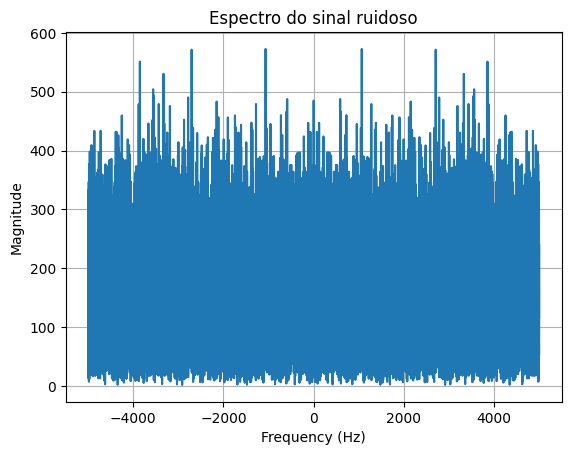

In [106]:
# Parâmetros
time = 3  # Duração do sinal
Ts = 1 / 10000  # Intervalo de amostragem
Fs = 1 / Ts # Frequencia de amostragem (Hz)
N = int(time / Ts)  # Número de amostras
sinal_ruidoso = np.random.randn(N)  # Gera o sinal de ruído branco

plotspec(sinal_ruidoso, Ts, "Espectro do sinal ruidoso")

## a

passe todas as frequências acima
de $500 Hz$

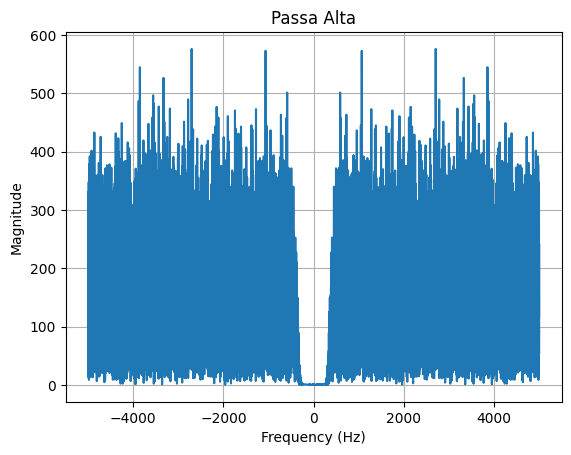

In [107]:
cutoff = 500.0    # Desired cutoff frequency, Hz
trans_width = 250  # Width of transition from pass to stop, Hz
numtaps = 149      # Size of the FIR filter.

taps_hb = signal.remez(numtaps, [0, cutoff - trans_width, cutoff, 0.5*Fs],
                    [0, 1], fs=Fs)

sinal_filtrado_hb = signal.lfilter(taps_hb, 1, sinal_ruidoso)

plotspec(sinal_filtrado_hb, Ts, "Passa Alta")

## b

 passe todas as frequências abaixo de $3 kHz$

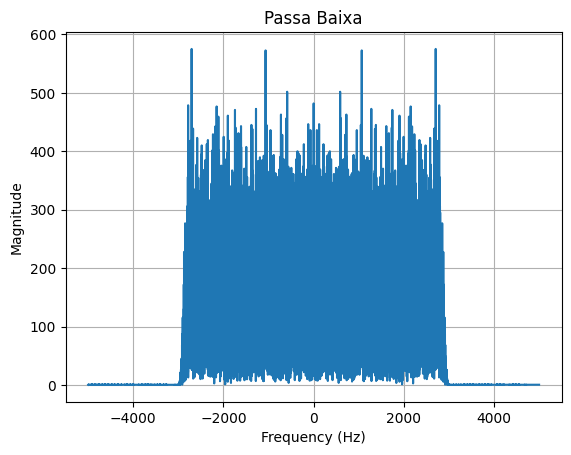

In [108]:
cutoff = 3000.0    # Desired cutoff frequency, Hz
trans_width = 250  # Width of transition from pass to stop, Hz
numtaps = 149      # Size of the FIR filter.

taps_lb = signal.remez(numtaps, [0, cutoff - trans_width, cutoff, 0.5*Fs],
                    [1, 0], fs=Fs)

sinal_filtrado_lb = signal.lfilter(taps_lb, 1, sinal_ruidoso)

plotspec(sinal_filtrado_lb, Ts, "Passa Baixa")

## c
rejeite todas as frequências
entre $1.5 kHz$ e $2.5 kHz$

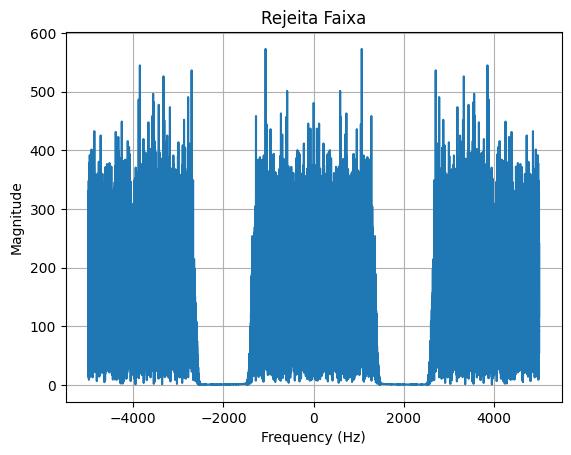

In [109]:
band = [1500, 2500]  # Desired pass band, Hz
trans_width = 260    # Width of transition from pass to stop, Hz
numtaps = 149         # Size of the FIR filter.
edges = [0, band[0] - trans_width, band[0], band[1],
         band[1] + trans_width, 0.5*Fs]

taps_rb = signal.remez(numtaps, edges, [1, 0, 1], fs=Fs)

sinal_filtrado_rb = signal.lfilter(taps_rb, 1, sinal_ruidoso)

plotspec(sinal_filtrado_rb, Ts, "Rejeita Faixa")

## d
reprojete os três filtros anteriores considerando que a frequência
de amostragem foi alterada para $Fs = 20 kHz$

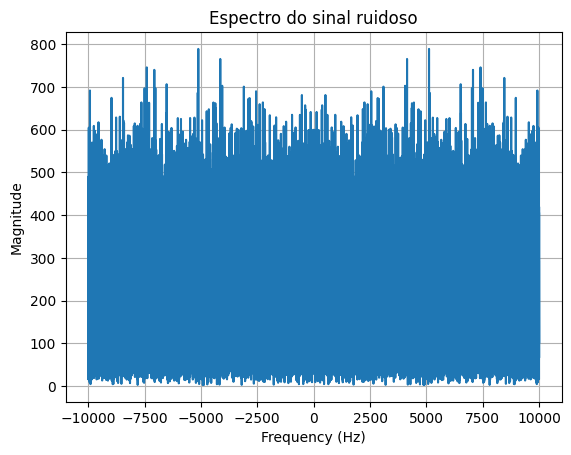

In [110]:
# Parâmetros
time = 3  # Duração do sinal
Fs = 20000 # Frequencia de amostragem (Hz)
Ts = 1 / Fs  # Intervalo de amostragem
N = int(time / Ts)  # Número de amostras
sinal_ruidoso = np.random.randn(N)  # Gera o sinal de ruído branco


plotspec(sinal_ruidoso, Ts, "Espectro do sinal ruidoso")

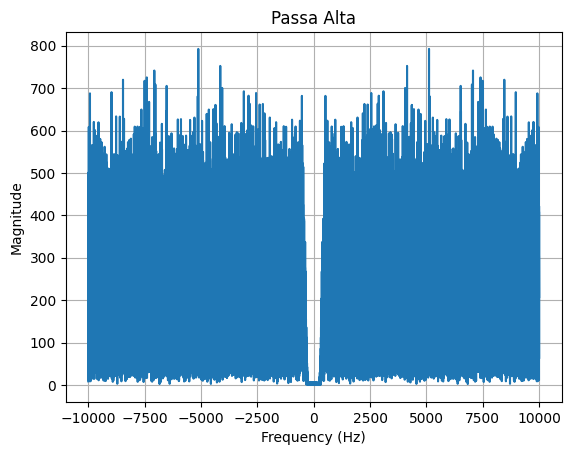

In [111]:
cutoff = 500.0    # Desired cutoff frequency, Hz
trans_width = 250  # Width of transition from pass to stop, Hz
numtaps = 149      # Size of the FIR filter.

taps_hb = signal.remez(numtaps, [0, cutoff - trans_width, cutoff, 0.5*Fs],
                    [0, 1], fs=Fs)

sinal_filtrado_hb = signal.lfilter(taps_hb, 1, sinal_ruidoso)

plotspec(sinal_filtrado_hb, Ts, "Passa Alta")

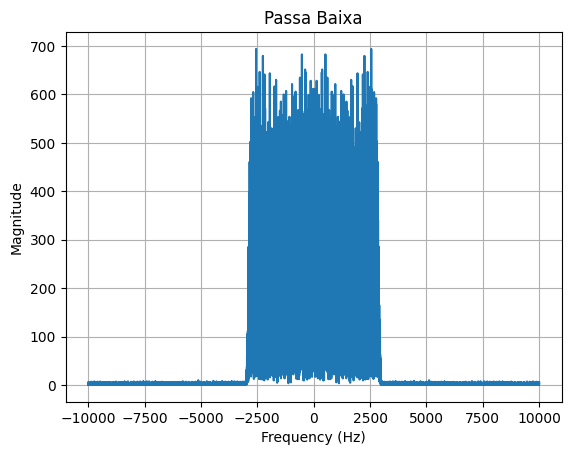

In [112]:
cutoff = 3000.0    # Desired cutoff frequency, Hz
trans_width = 250  # Width of transition from pass to stop, Hz
numtaps = 149      # Size of the FIR filter.

taps_lb = signal.remez(numtaps, [0, cutoff - trans_width, cutoff, 0.5*Fs],
                    [1, 0], fs=Fs)

sinal_filtrado_lb = signal.lfilter(taps_lb, 1, sinal_ruidoso)

plotspec(sinal_filtrado_lb, Ts, "Passa Baixa")

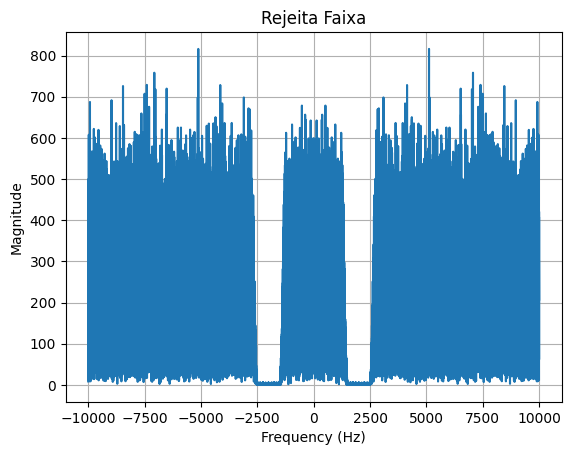

In [113]:
band = [1500, 2500]  # Desired pass band, Hz
trans_width = 260    # Width of transition from pass to stop, Hz
numtaps = 149         # Size of the FIR filter.
edges = [0, band[0] - trans_width, band[0], band[1],
         band[1] + trans_width, 0.5*Fs]

taps_bp = signal.remez(numtaps, edges, [1, 0, 1], fs=Fs)

sinal_filtrado_bp = signal.lfilter(taps_bp, 1, sinal_ruidoso)

plotspec(sinal_filtrado_bp, Ts, "Rejeita Faixa")

# Q2
Seja $x_1(t)$ um coseno com frequência $f1 = 800 Hz$, $x_2(t)$ um coseno com frequência $f2 = 2000
Hz$, e $x_3(t)$ um coseno com frequência $f3 = 4500 Hz$. Seja $x(t) = x_1(t) + 0.5x_2(t) + 2x_3(t)$.
Use $x(t)$ como sinal de entrada a cada um dos três filtros projetados no item anterior. Faça o
gráfico dos espectros e explique o que ocorreu.

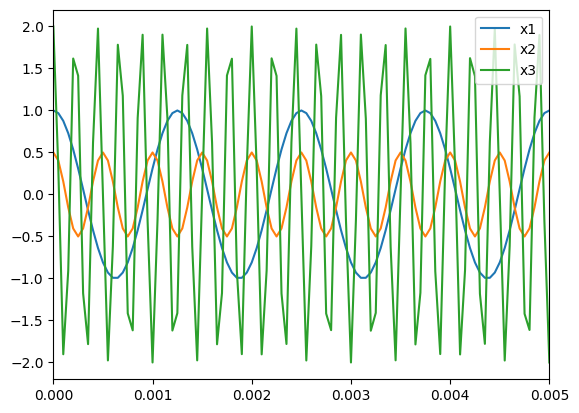

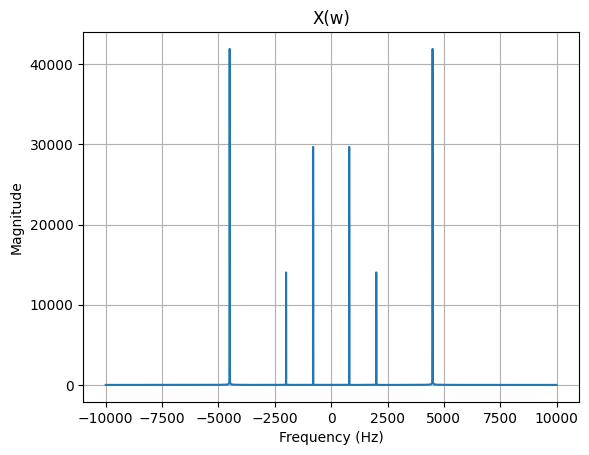

In [114]:
# Parâmetros
time = 3  # Duração do sinal
Ts = 1 / 20000  # Intervalo de amostragem
Fs = 1 / Ts # Frequencia de amostragem (Hz)
N = int(time / Ts)  # Número de amostras

t = np.linspace(0., time + Ts, N)

f1 = 800
f2 = 2000
f3 = 4500

x1 = np.cos(2 * np.pi * f1 * t)
x2 = 0.5 * np.cos(2 * np.pi * f2 * t)
x3 = 2 * np.cos(2 * np.pi * f3 * t)

x = x1 + x2 + x3

plt.plot(t, x1, label="x1")
plt.plot(t, x2, label="x2")
plt.plot(t, x3, label="x3")

plt.xlim(0, 0.005)
plt.legend()

plt.show()

plotspec(x, Ts, "X(w)")

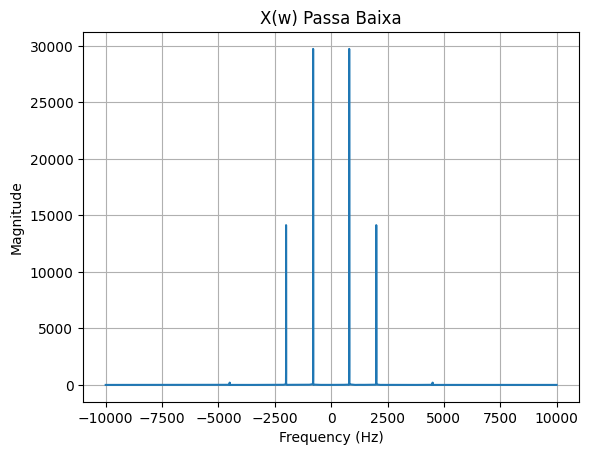

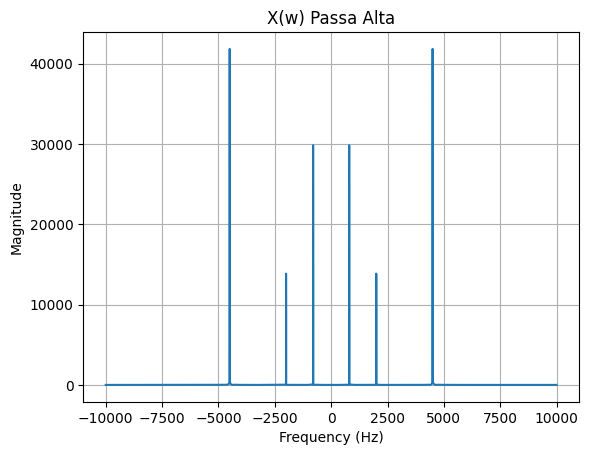

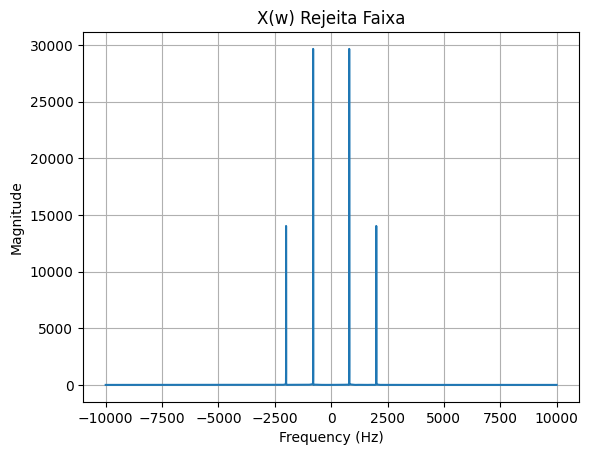

In [115]:
x_filtrado_lb = signal.lfilter(taps_lb, 1, x)
x_filtrado_hb = signal.lfilter(taps_hb, 1, x)
x_filtrado_rb = signal.lfilter(taps_rb, 1, x)

plotspec(x_filtrado_lb, Ts, "X(w) Passa Baixa")
plotspec(x_filtrado_hb, Ts, "X(w) Passa Alta")
plotspec(x_filtrado_rb, Ts, "X(w) Rejeita Faixa")

Os filtros projetados na questão anterior são suficientes para atenuar
as frequências delimitadas na questão. As frequências de $x_1(t)$,
$x_2(t)$ e $x_3(t)$ poderão está dentro da região de atenuação do filtro.
<br>
Os gráficos também servem para uma melhor visualização se o filtro projetado
estão realizando a atenuação dentro da faixa delimitada no projeto.

# Q5
A partir do código modulate.m encontre o espectro da saída $y(t)$ de um modulador (com
frequência de portadora $fc = 1 kHz$) considerando que a entrada é um sinal de ruído com
largura de banda limitada entre $2 kHz$ e $2.3 kHz$. Dica: Esse ruído pode ser obtido a partir da
filtragem de um ruído branco por um filtro passa-faixa.

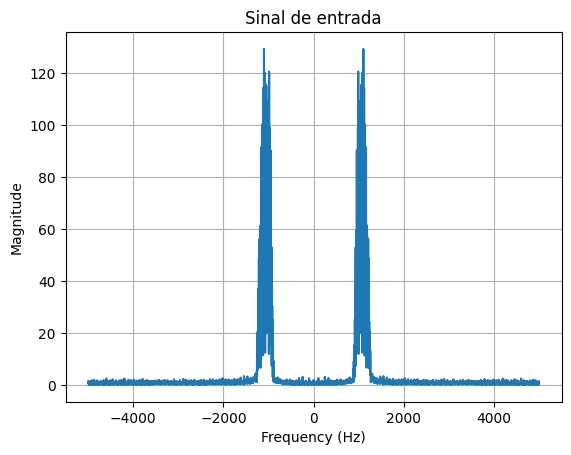

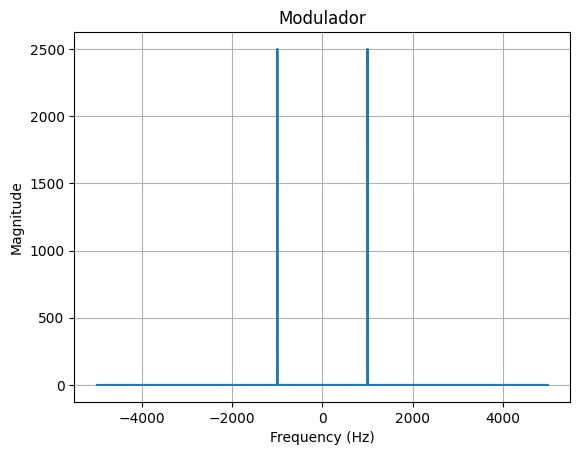

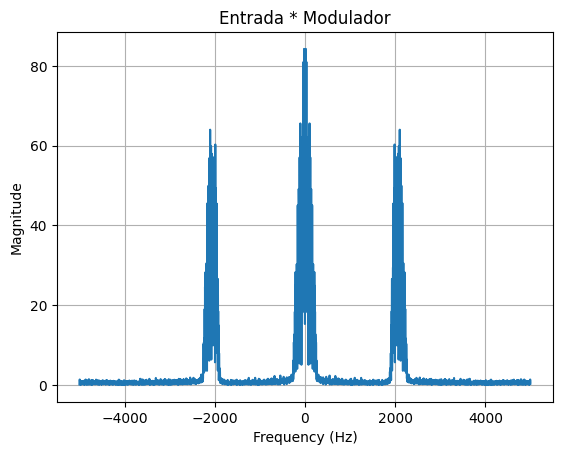

In [116]:
# Parâmetros do sinal
time = 0.5  # tempo total
Ts = 1 / 10000  # intervalo de amostragem
N = int(time / Ts)  # Número de amostras
sinal_ruidoso = np.random.randn(N)  # Gera o sinal de ruído branco

t = np.arange(Ts, time+Ts, Ts)  # vetor de tempo

fc = 1000  # frequência do cosseno modulador

cmod = np.cos(2 * np.pi * fc * t)  # cosseno do modulador

band = [2000, 2300]  # Desired pass band, Hz
trans_width = 250    # Width of transition from pass to stop, Hz
numtaps = 149         # Size of the FIR filter.
edges = [0, band[0] - trans_width, band[0], band[1],
         band[1] + trans_width, 0.5*Fs]

taps_bb = signal.remez(numtaps, edges, [0, 1, 0], fs=Fs)

sinal_de_entrada = signal.lfilter(taps_bb, 1, sinal_ruidoso)

y = cmod * sinal_de_entrada  # multiplicação do sinal de entrada pelo modulador

plotspec(sinal_de_entrada, Ts, "Sinal de entrada")
plotspec(cmod, Ts, "Modulador")
plotspec(y, Ts, "Entrada * Modulador")

# Q6

A partir de *AMlarge.m* mostre o gráfico do espectro da mensagem $w(t)$, o espectro da portadora
$c(t)$, e o espectro do sinal recebido $v(t)$. Qual é o espectro do envelope ? Quão próximo estão
os resultados experimentais obtidos, dos resultados teóricos ?

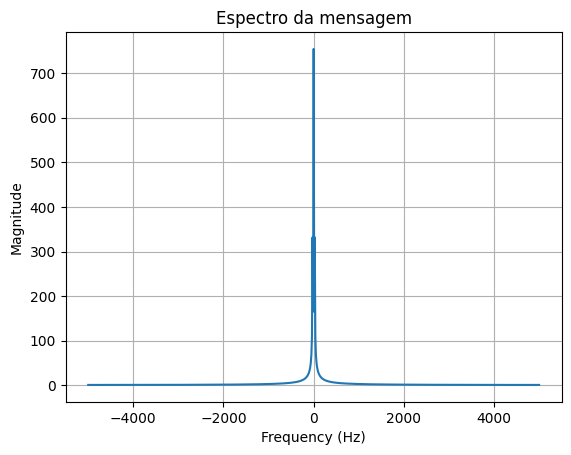

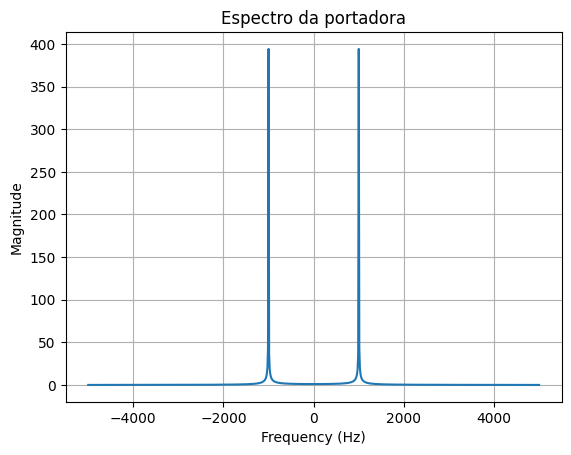

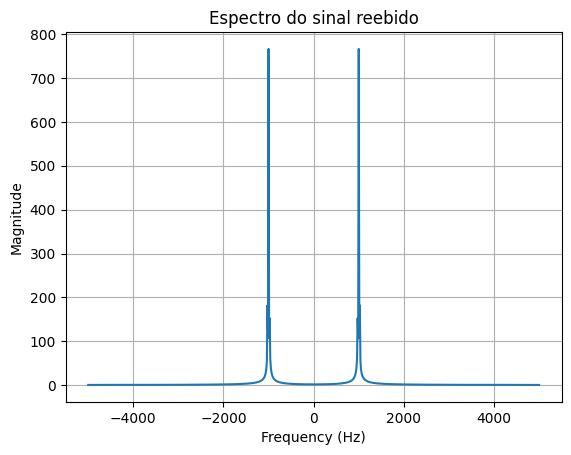

In [117]:
# Parâmetros de tempo e amostragem
time = 0.08  # duração do sinal
Ts = 1 / 10000  # intervalo de amostragem
t = np.arange(0, time + Ts, Ts)  # vetor de tempo
lent = len(t)  # comprimento do vetor de tempo

# Definição do portador (carrier)
fc = 1000
c = np.cos(2 * np.pi * fc * t)  # portadora na frequência fc

# Definição da mensagem (message)
fm = 20
w = 1 + np.cos(2 * np.pi * fm * t)  # mensagem (garantido que seja > -1)

# Modulação com portadora grande
v = c * w + c  # modulação com portadora grande

plotspec(w, Ts, "Espectro da mensagem")
plotspec(c, Ts, "Espectro da portadora")
plotspec(v, Ts, "Espectro do sinal reebido")

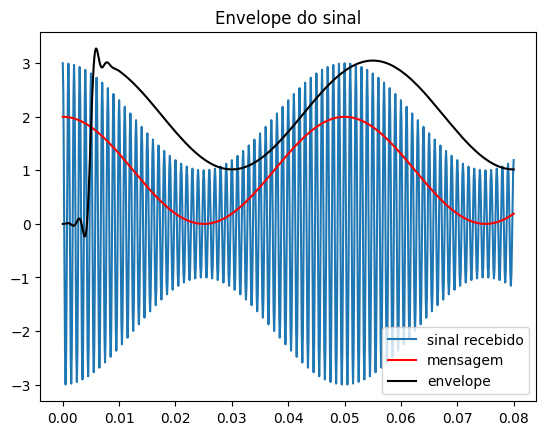

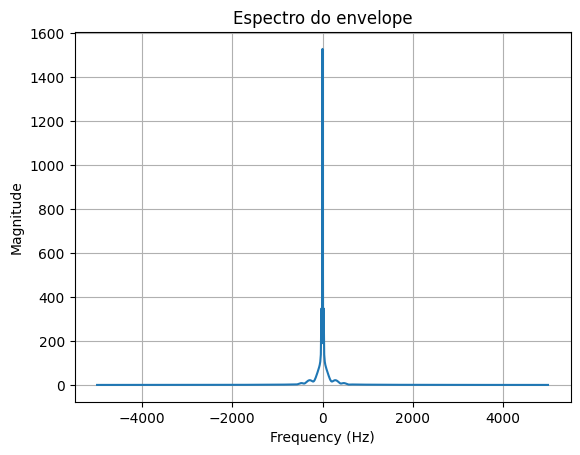

In [118]:
# Design do filtro passa-baixa
fbe = [0, 0.1, 0.2, 1]  # bordas da resposta em frequência normalizada
damps = [1, 1, 0, 0]  # resposta desejada (ganho)
fl = 100  # ordem do filtro
b = signal.firwin(fl + 1, cutoff=0.1, window="hamming")  # resposta ao impulso do filtro

# Detector de envelope (filtro aplicado ao valor absoluto do sinal modulado)
envv = (np.pi / 2) * signal.lfilter(b, 1, np.abs(v))

plt.plot(t, v, label='sinal recebido')
plt.plot(t, w, label='mensagem', color='red')
plt.plot(t,envv, label='envelope', color='black')

plt.title("Envelope do sinal")
plt.legend()

plt.show()

plotspec(envv, Ts, "Espectro do envelope")

FAZER  A RESPOSTA DA QUESTÃO
ESTUDUAR SOBRE MODULAÇÃO

# Q7

Uma das vantagens da transmissão usando AM com portadora incluída é que não é necessário
se conhecer na recepção o valor exato da fase ou frequência da portadora recebida. Verifique
isso a partir de *AMlarge.m*, como segue: (a) Altere a fase do sinal transmitido; por exemplo,
faça $c = cos(2πfct + ϕ)$ com $ϕ = 0.1, 0.5, π/3, π/2, π$, e verifique que o envelope recuperado
mantém-se inalterado; (b) Altere a frequência do sinal transmitido; por exemplo, faça 
$c = cos(2π(fc + g)t)$ com $g = 10, −10, 100, −100$, e verifique que o envelope recuperado 
mantém-se inalterado. Pode $g$ ser muito grande?

## a
Altere a fase do sinal transmitido; por exemplo,
faça $c = cos(2πfct + ϕ)$ com $ϕ = 0.1, 0.5, π/3, π/2, π$, e verifique que o envelope recuperado
mantém-se inalterado

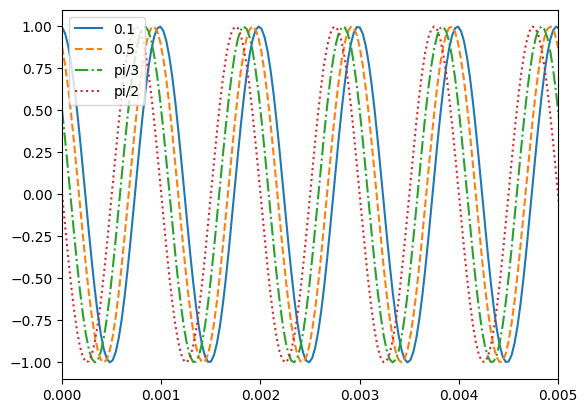

In [119]:
# Parâmetros de tempo e amostragem
time = 0.3  # duração do sinal
Ts = 1 / 10000  # intervalo de amostragem
t = np.linspace(0, time + Ts, 10000)  # vetor de tempo
lent = len(t)  # comprimento do vetor de tempo

# Definição do portador (carrier)
fc = 1000
phi = [0.1, 0.5, np.pi/3., np.pi/2.]
c_vector = np.zeros((len(phi), lent))
# c = np.cos(2 * np.pi * fc * t + phi)  # portadora na frequência fc
for i in range(4):
    c_vector[i] = np.cos(2 * np.pi * fc * t + phi[i])  # portadora na frequência fc

# Definição da mensagem (message)
fm = 20
w = 1 + np.cos(2 * np.pi * fm * t)  # mensagem (garantido que seja > -1)

# Modulação com portadora grande
v = c_vector * w  # modulação com portadora grande

plt.plot(t, c_vector[0], label="0.1", linestyle='-')
plt.plot(t, c_vector[1], label="0.5", linestyle='--')
plt.plot(t, c_vector[2], label="pi/3", linestyle='-.')
plt.plot(t, c_vector[3], label="pi/2", linestyle=':')

plt.legend()
plt.xlim(0, 0.005)

plt.show()

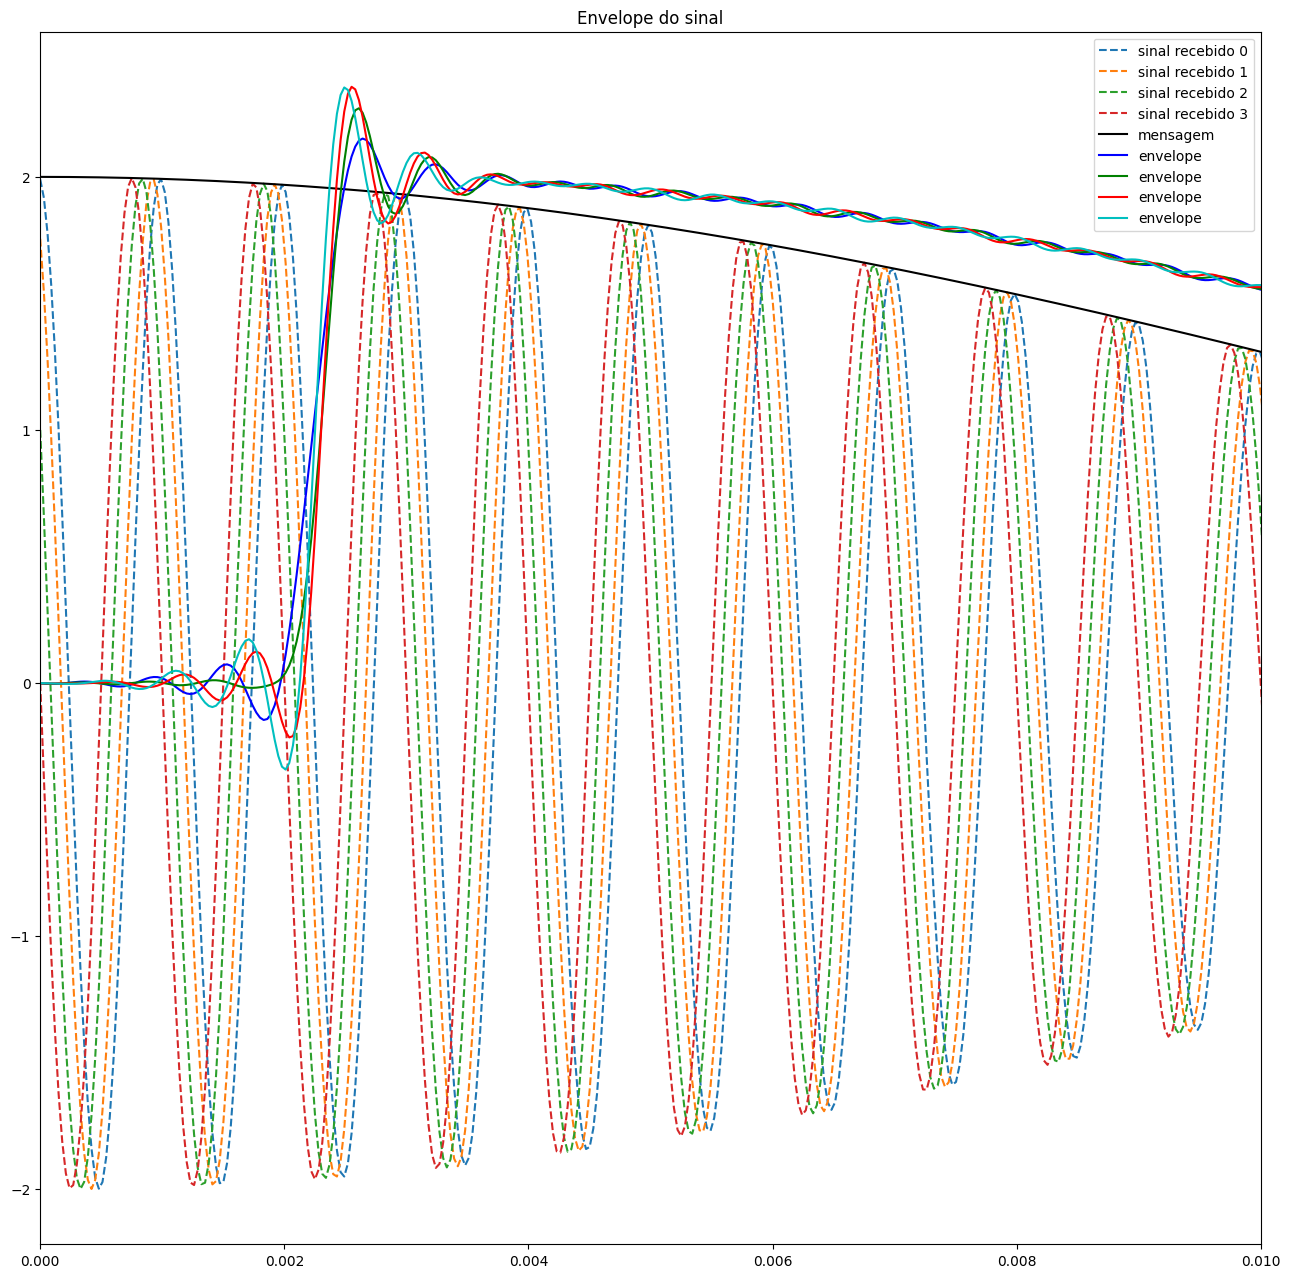

In [120]:
# Design do filtro passa-baixa
fbe = [0, 0.1, 0.2, 1]  # bordas da resposta em frequência normalizada
damps = [1, 1, 0, 0]  # resposta desejada (ganho)
fl = 150  # ordem do filtro
b = signal.firwin(fl + 1, cutoff=0.1, window="hamming")  # resposta ao impulso do filtro

# Detector de envelope (filtro aplicado ao valor absoluto do sinal modulado)
envv = (np.pi / 2) * signal.lfilter(b, 1, np.abs(v))


figure(figsize=(cm_to_inch(40),cm_to_inch(40)))
plt.plot(t, v[0], label='sinal recebido 0', linestyle='--')
plt.plot(t, v[1], label='sinal recebido 1', linestyle='--')
plt.plot(t, v[2], label='sinal recebido 2', linestyle='--')
plt.plot(t, v[3], label='sinal recebido 3', linestyle='--')
plt.plot(t, w, label='mensagem', color='k')
plt.plot(t,envv[0], label='envelope', color='b')
plt.plot(t,envv[1], label='envelope', color='g')
plt.plot(t,envv[2], label='envelope', color='r')
plt.plot(t,envv[3], label='envelope', color='c')

plt.title("Envelope do sinal")
plt.legend()
plt.xlim(0, 0.01)

plt.show()

## b
Altere a frequência do sinal transmitido; por exemplo, faça 
$c = cos(2π(fc + g)t)$ com $g = 10, −10, 100, −100$, e verifique que o envelope recuperado 
mantém-se inalterado. Pode $g$ ser muito grande?

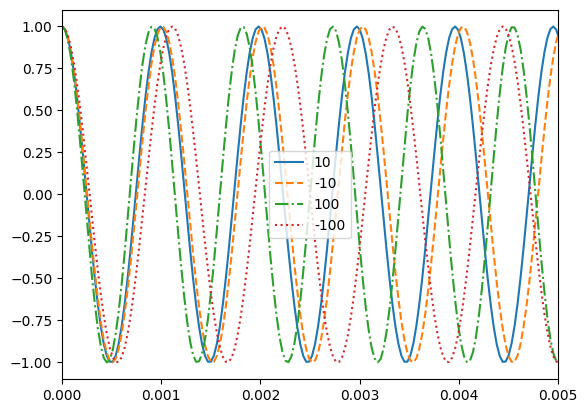

In [121]:
# Parâmetros de tempo e amostragem
time = 0.3  # duração do sinal
Ts = 1 / 10000  # intervalo de amostragem
t = np.linspace(0, time + Ts, 10000)  # vetor de tempo
lent = len(t)  # comprimento do vetor de tempo

# Definição do portador (carrier)
fc = 1000
g = [10, -10, 100, -100]
c_vector = np.zeros((len(g), lent))
# c = np.cos(2 * np.pi * fc * t + phi)  # portadora na frequência fc
for i in range(4):
    c_vector[i] = np.cos(2 * np.pi * (fc+g[i]) * t)  # portadora na frequência fc

# Definição da mensagem (message)
fm = 20
w = 1 + np.cos(2 * np.pi * fm * t)  # mensagem (garantido que seja > -1)

# Modulação com portadora grande
v = c_vector * w  # modulação com portadora grande

plt.plot(t, c_vector[0], label="10", linestyle='-')
plt.plot(t, c_vector[1], label="-10", linestyle='--')
plt.plot(t, c_vector[2], label="100", linestyle='-.')
plt.plot(t, c_vector[3], label="-100", linestyle=':')

plt.legend()
plt.xlim(0, 0.005)

plt.show()

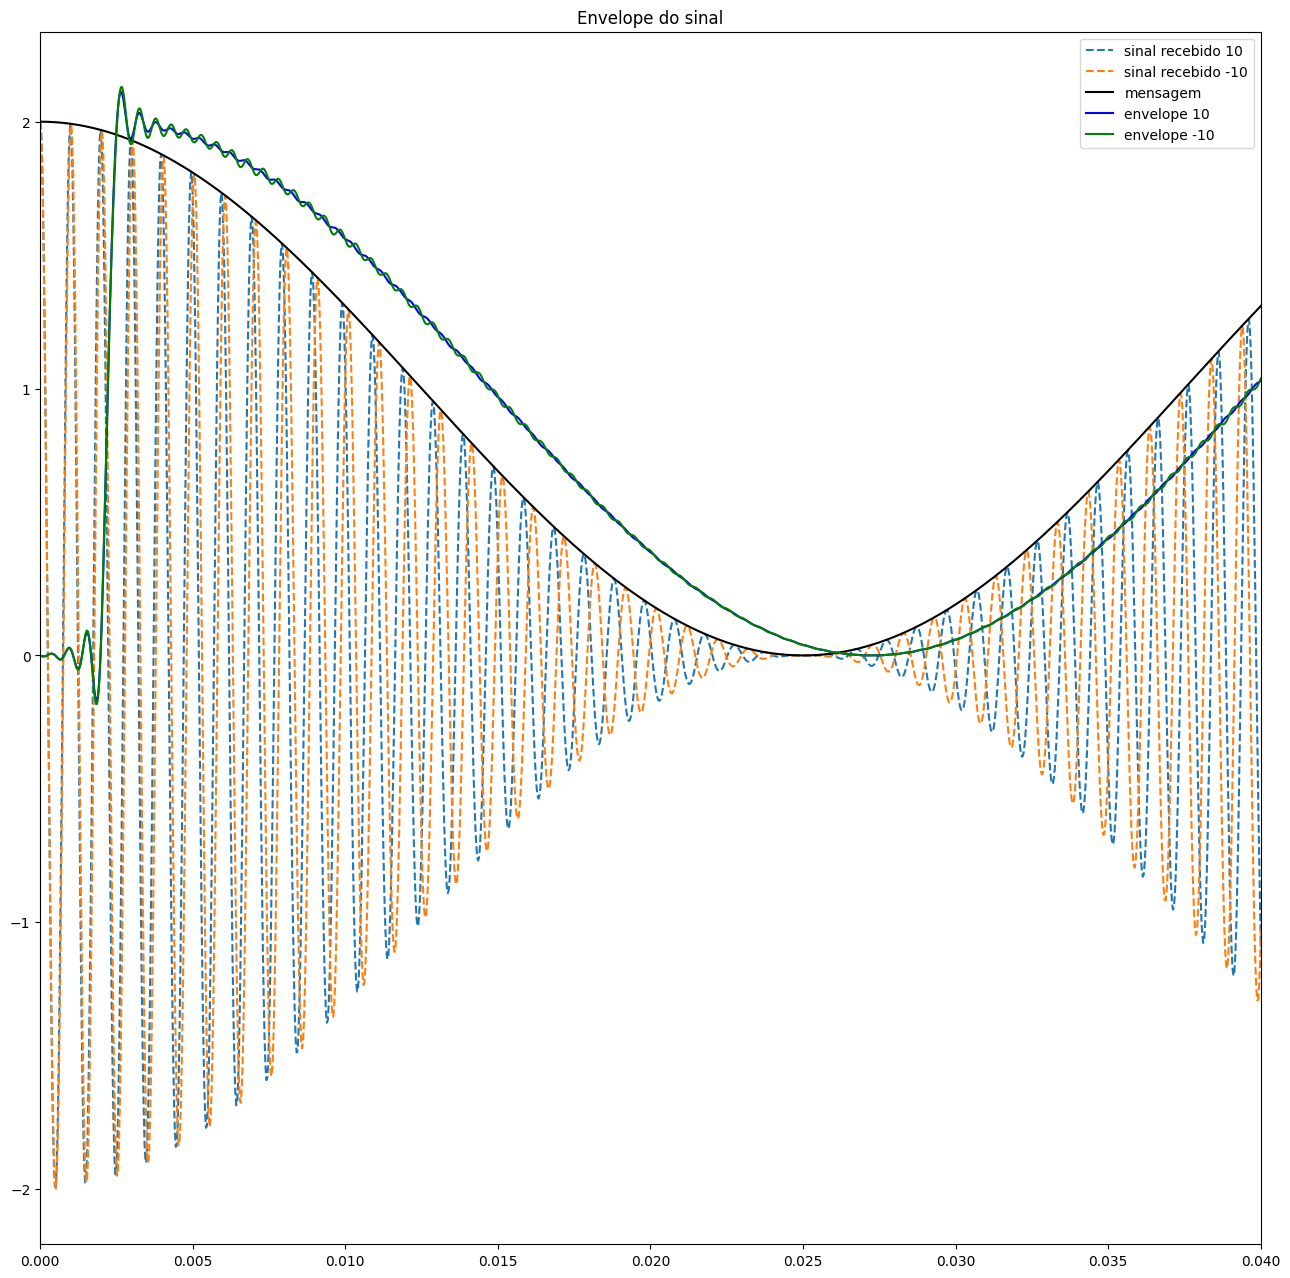

In [122]:
# Design do filtro passa-baixa
fbe = [0, 0.1, 0.2, 1]  # bordas da resposta em frequência normalizada
damps = [1, 1, 0, 0]  # resposta desejada (ganho)
fl = 150  # ordem do filtro
b = signal.firwin(fl + 1, cutoff=0.1, window="hamming")  # resposta ao impulso do filtro

# Detector de envelope (filtro aplicado ao valor absoluto do sinal modulado)
envv = (np.pi / 2) * signal.lfilter(b, 1, np.abs(v))


figure(figsize=(cm_to_inch(40),cm_to_inch(40)))
plt.plot(t, v[0], label='sinal recebido 10', linestyle='--')
plt.plot(t, v[1], label='sinal recebido -10', linestyle='--')
# plt.plot(t, v[2], label='sinal recebido 100', linestyle='--')
# plt.plot(t, v[3], label='sinal recebido -100', linestyle='--')
plt.plot(t, w, label='mensagem', color='k')
plt.plot(t,envv[0], label='envelope 10', color='b')
plt.plot(t,envv[1], label='envelope -10', color='g')
# plt.plot(t,envv[2], label='envelope 100', color='r')
# plt.plot(t,envv[3], label='envelope -100', color='c')

plt.title("Envelope do sinal")
plt.legend()
plt.xlim(0.0, 0.04)

plt.show()

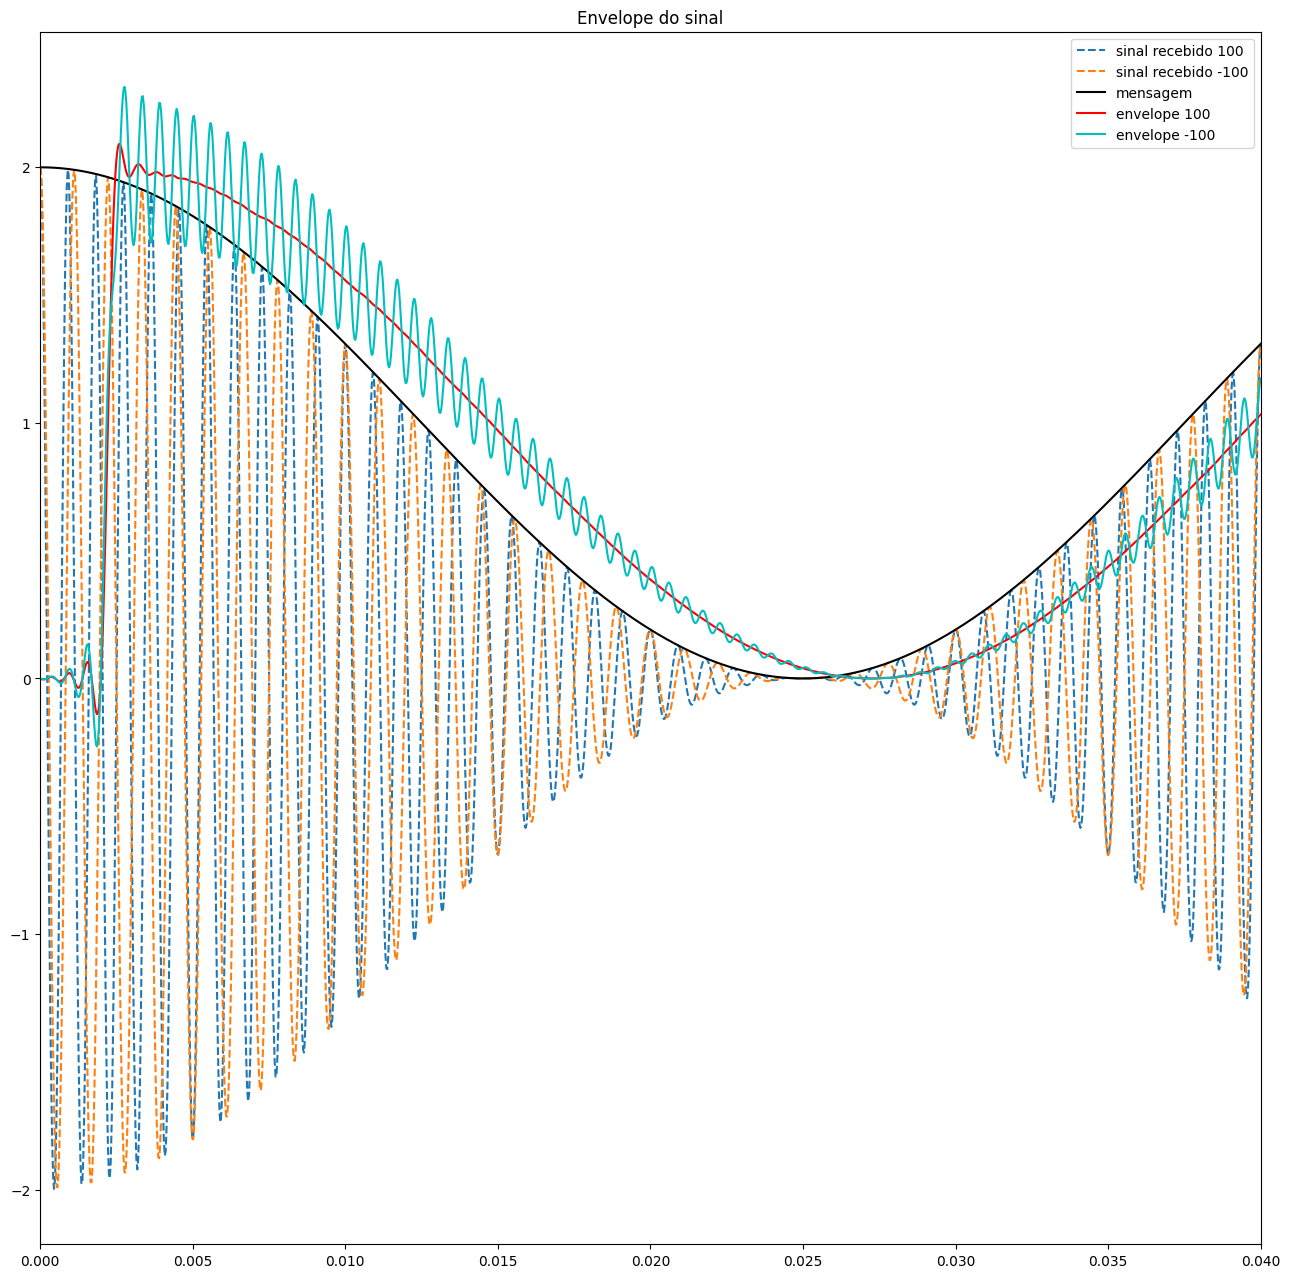

In [123]:
figure(figsize=(cm_to_inch(40),cm_to_inch(40)))
plt.plot(t, v[2], label='sinal recebido 100', linestyle='--')
plt.plot(t, v[3], label='sinal recebido -100', linestyle='--')
plt.plot(t, w, label='mensagem', color='k')
plt.plot(t,envv[2], label='envelope 100', color='r')
plt.plot(t,envv[3], label='envelope -100', color='c')

plt.title("Envelope do sinal")
plt.legend()
plt.xlim(0.0, 0.04)

plt.show()

### Fazendo $g$ ser muito grande

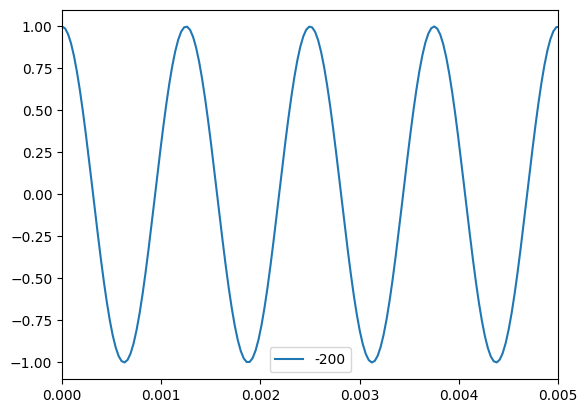

In [126]:
# Parâmetros de tempo e amostragem
time = 0.3  # duração do sinal
Ts = 1 / 10000  # intervalo de amostragem
t = np.linspace(0, time + Ts, 10000)  # vetor de tempo
lent = len(t)  # comprimento do vetor de tempo

# Definição do portador (carrier)
fc = 1000
g = -200
c = np.cos(2 * np.pi * (fc + g) * t)  # portadora na frequência fc
# Definição da mensagem (message)
fm = 20
w = 1 + np.cos(2 * np.pi * fm * t)  # mensagem (garantido que seja > -1)

# Modulação com portadora grande
v = c * w  # modulação com portadora grande

plt.plot(t, c, label=str(g), linestyle='-')

plt.legend()
plt.xlim(0, 0.005)

plt.show()

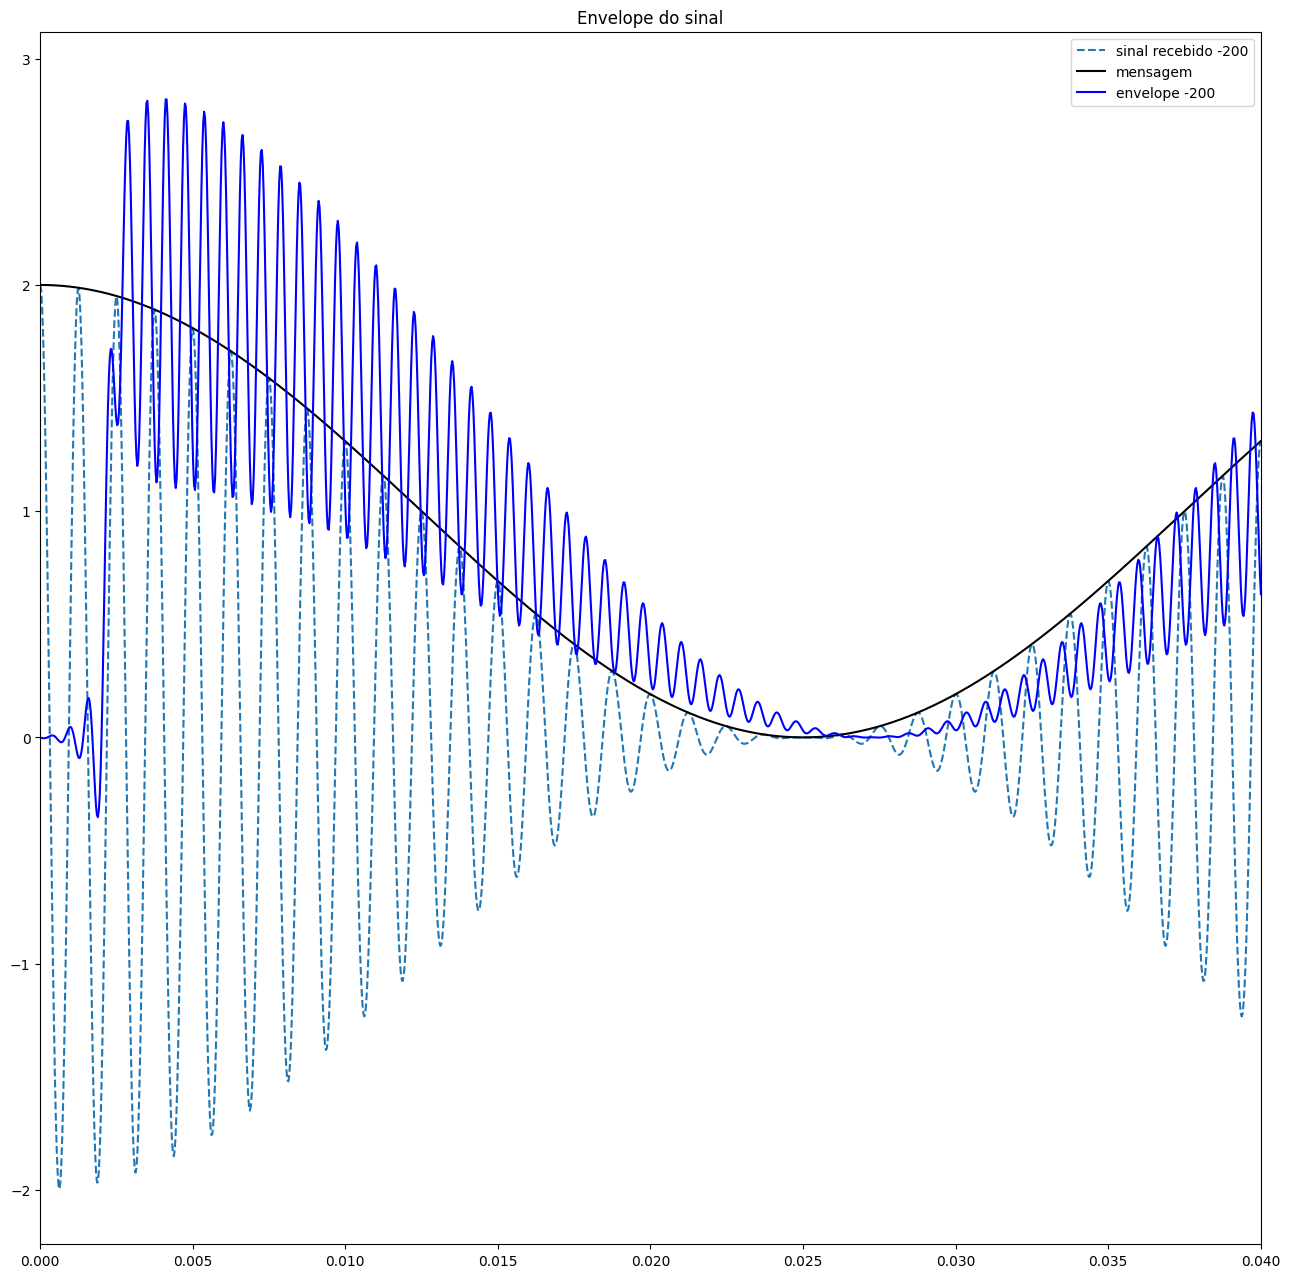

In [127]:
# Design do filtro passa-baixa
fbe = [0, 0.1, 0.2, 1]  # bordas da resposta em frequência normalizada
damps = [1, 1, 0, 0]  # resposta desejada (ganho)
fl = 150  # ordem do filtro
b = signal.firwin(fl + 1, cutoff=0.1, window="hamming")  # resposta ao impulso do filtro

# Detector de envelope (filtro aplicado ao valor absoluto do sinal modulado)
envv = (np.pi / 2) * signal.lfilter(b, 1, np.abs(v))


figure(figsize=(cm_to_inch(40),cm_to_inch(40)))
plt.plot(t, v, label=f'sinal recebido {g}', linestyle='--')
plt.plot(t, w, label='mensagem', color='k')
plt.plot(t,envv, label=f'envelope {str(g)}', color='b')

plt.title("Envelope do sinal")
plt.legend()
plt.xlim(0.0, 0.04)

plt.show()